<a href="https://colab.research.google.com/github/anderboni/Projeto_Modulo_02_Bootcamp_Data_Science/blob/main/Projeto_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO do Módulo 2 - Bootcamp Data Science**

*Última atualização em 13/06/2021.*


###**Proposta do projeto**: 
<p align = "justify">Análise relativa às imunizações para a POLIOMIELITE no perído compreendido entre 1997 e 2018, em nível de país, de forma ampla, e dos Estados da Região Sul, em particular, comparando com a população no mesmo período ou em certo período a ser determinado ao longo do estudo, conforme disponibilidade dos dados.</p>

###**Hipótese**:
<p align = "justify"> A preocupação com o aumento de casos de poliomielite em crianças, em alguns países, conforme publicações disponibilizadas por meio de links no resumo deste projeto, pode ser fundamentada na falta de aplicação de vacinas. A causa pode surgir tanto da falta de doses para vacinação ou a partir de campanhas não abrangentes por parte dos governos. Outra possibilidade a ser considerada é a falta de adesão às campanhas por parte dos pais ou responsáveis. Durante o estudo é possível que seja percebida uma diminuição na aplicação das vacinas no decorrer dos anos, especificamente no Brasil, alvo de nossa análise, restando determinar a causa deste decrécimo.</p>

Embora não haja casos relatados em nosso país desde o ano de 1989, em 2018 ainda havia 29 casos no mundo, conforme o site da Organização Pan Americana de Saúde. (FONTE: https://www.paho.org/pt/topicos/poliomielite#:~:text=Os%20casos%20de%20poliomielite%20diminu%C3%ADram,risco%20de%20contrair%20a%20poliomielite).



---



# **POLIOMIELITE**

**Vacinas de poliomielite aplicadas nos Estados Brasileiros** 

<p align = "justify">Iniciamos o projeto com a importação dos dados relativos a aplicação de vacinas para a poliomielite, obtidos através do sistema TABNET no site do DATASUS, salientando-se que em alguns anos os dados não estão completos, conforme alertado no RESUMO deste projeto, e por este motivo optamos por não incluí-los no presente estudo. Dessa forma iremos considerar apenas o período compreendido entre 1997 e 2018 para esta análise.</p>

In [145]:
#importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#importando os dados obtidos no TABNET, fazendo ajustes e gerando a visuaização prévia

polio = pd.read_csv("https://github.com/anderboni/Projeto_Modulo_02_Bootcamp_Data_Science/raw/main/Dados/A220715189_28_143_208.csv", encoding="ISO-8859-1", skiprows= 4, sep=";", skipfooter=19, engine="python")

polio.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,23868,25553,28089,27372,31703,29458,30687,32260,30817,30004,30011,30979,30436,27794,28390,29203,26389,27986,27559,27664,28654,28514,29049,29923,27046,15704,735112
1,12 Acre,3354,6286,8550,10176,9521,10469,14104,16969,19380,21043,18263,16242,15567,18825,17025,18696,17536,18717,16194,16509,12585,14078,12167,12612,12207,8156,365231
2,13 Amazonas,14101,35530,52932,56596,58704,58301,73492,70224,73211,69813,65233,66858,67905,68361,65312,70763,69942,65908,69525,73694,76499,82643,61556,61601,60189,42999,1631892
3,14 Roraima,3697,6645,6076,5831,7537,7421,13067,8215,8389,8780,8867,9727,8723,9103,9045,9989,9318,9203,8554,8543,9490,12131,9820,9716,9089,6132,223108
4,15 Pará,65130,69625,75020,73342,126192,132469,171439,167304,187192,190842,178529,179784,174558,166888,165702,151337,147442,144821,139453,137661,116248,100218,90485,96257,93892,59386,3401216


In [146]:
#informações sobre os dados
polio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  28 non-null     object
 1   1994                  28 non-null     object
 2   1995                  28 non-null     object
 3   1996                  28 non-null     object
 4   1997                  28 non-null     int64 
 5   1998                  28 non-null     int64 
 6   1999                  28 non-null     int64 
 7   2000                  28 non-null     int64 
 8   2001                  28 non-null     int64 
 9   2002                  28 non-null     int64 
 10  2003                  28 non-null     int64 
 11  2004                  28 non-null     int64 
 12  2005                  28 non-null     int64 
 13  2006                  28 non-null     int64 
 14  2007                  28 non-null     int64 
 15  2008                  28 non-null     int6

In [147]:
#ajustando a coluna "Unidade da Federação" como index e outros detalhes dos dados

colunas_usaveis = polio.mean().index.tolist() #o index é uma série imutável, e por isso precisamos adicionar "tolist" para transformar numa lista de python, que é mutável.
colunas_usaveis.insert(0, "Unidade da Federação")

polio_usaveis = polio[colunas_usaveis] #uma variável nova recebendo os dados, para não alterar os anteriores.

polio_usaveis = polio_usaveis.set_index("Unidade da Federação") #indexando

polio_usaveis = polio_usaveis.drop("2019", axis=1) #descartando a coluna "2019", pois os dados deste ano estão incompleto

polio_usaveis = polio_usaveis.drop("Total", axis=1) #descartando a coluna "Total", pois ela não reflete a soma real dos dados que estaremos trabalhando (anos). O "Total" da coluna pode ser mantido, pois não incluímos ou retiramos qualquer Estado.

polio_usaveis.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,27372,31703,29458,30687,32260,30817,30004,30011,30979,30436,27794,28390,29203,26389,27986,27559,27664,28654,28514,29049,29923,27046
12 Acre,10176,9521,10469,14104,16969,19380,21043,18263,16242,15567,18825,17025,18696,17536,18717,16194,16509,12585,14078,12167,12612,12207
13 Amazonas,56596,58704,58301,73492,70224,73211,69813,65233,66858,67905,68361,65312,70763,69942,65908,69525,73694,76499,82643,61556,61601,60189
14 Roraima,5831,7537,7421,13067,8215,8389,8780,8867,9727,8723,9103,9045,9989,9318,9203,8554,8543,9490,12131,9820,9716,9089
15 Pará,73342,126192,132469,171439,167304,187192,190842,178529,179784,174558,166888,165702,151337,147442,144821,139453,137661,116248,100218,90485,96257,93892


In [148]:
#incluindo novamente a coluna "Total", que soma todos os anos, mas agora apenas dos anos que realmente serão utilizados (1997 a 2018)

anos_validos = ["1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", 
                "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

#criando uma função para essa soma

def soma_coluna(dados, nome_nova_coluna, colunas_para_somar):
    dados[nome_nova_coluna] = dados[colunas_para_somar].astype(float).sum(axis=1)
    return(dados)

#utilizando a função acima

soma_coluna(polio_usaveis, "Total", anos_validos)

#exibindo os dados

polio_usaveis.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,27372,31703,29458,30687,32260,30817,30004,30011,30979,30436,27794,28390,29203,26389,27986,27559,27664,28654,28514,29049,29923,27046,641898.00
12 Acre,10176,9521,10469,14104,16969,19380,21043,18263,16242,15567,18825,17025,18696,17536,18717,16194,16509,12585,14078,12167,12612,12207,338885.00
13 Amazonas,56596,58704,58301,73492,70224,73211,69813,65233,66858,67905,68361,65312,70763,69942,65908,69525,73694,76499,82643,61556,61601,60189,1486330.00
14 Roraima,5831,7537,7421,13067,8215,8389,8780,8867,9727,8723,9103,9045,9989,9318,9203,8554,8543,9490,12131,9820,9716,9089,200558.00
15 Pará,73342,126192,132469,171439,167304,187192,190842,178529,179784,174558,166888,165702,151337,147442,144821,139453,137661,116248,100218,90485,96257,93892,3132055.00


In [149]:
#média das vacinas aplicads por ano, após os dados ajustados

pd.options.display.float_format = "{:.2f}".format
polio_media_anos = polio_usaveis.mean()
polio_media_anos

1997     201978.57
1998     217632.71
1999     230091.64
2000     244637.07
2001     237700.21
2002     229473.43
2003     229268.29
2004     225145.86
2005     227740.50
2006     221353.64
2007     217712.57
2008     209988.14
2009     213269.57
2010     204361.86
2011     208462.79
2012     198612.57
2013     209591.29
2014     200760.14
2015     203754.00
2016     179505.50
2017     179156.71
2018     179752.36
Total   4669949.43
dtype: float64

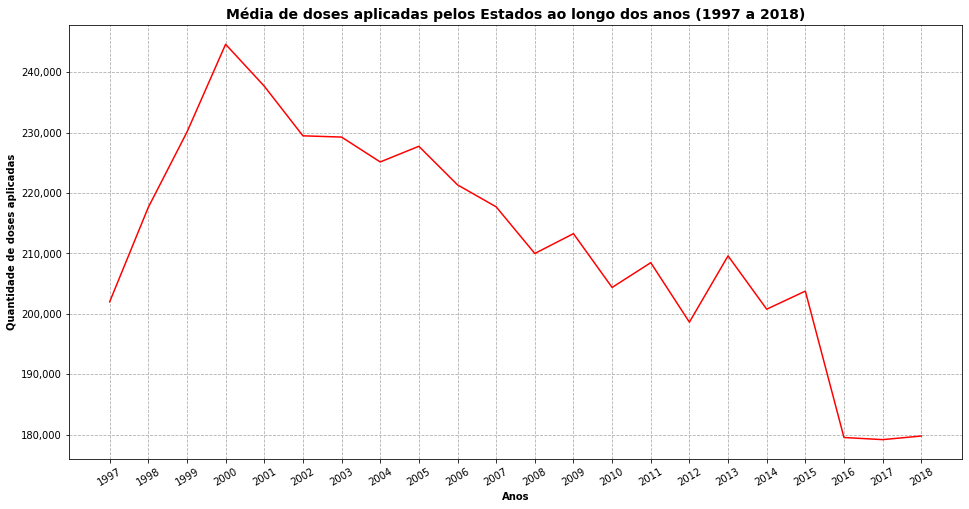

In [150]:
#gráfico da média de gastos ao longo dos anos

plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=polio_media_anos.drop("Total"), color= 'red')
#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=1,offset=0))
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel("Quantidade de doses aplicadas", fontweight='bold')
plt.xlabel("Anos",fontweight='bold')
plt.title("Média de doses aplicadas pelos Estados ao longo dos anos (1997 a 2018)", fontsize=14,fontweight='bold')
plt.show()

##GRÁFICO 01

<p align = "justify">Nesse primeiro gráfico (acima) podemos observar a média de aplicação de doses para a vacina da poliomielite sendo reduzida ao longo dos anos, com queda drástica a partir de 2015. Vale observar que, como possuímos apenas os dados até 2018, nada podemos supor acerca da elevação, manutenção ou queda ainda mais acentuada para a aplicação de doses. Observamos ainda que a aplicação de doses teve aumento linear apenas entre os anos de 1997 e 2000, lembrando que os dados válidos obtidos iniciam em 1997.</p>

In [151]:
#média das vacinas aplicads por Estado, após os dados ajustados
polio_media_estados = polio_usaveis.T.mean()
polio_media_estados

Unidade da Federação
11 Rondônia                55817.22
12 Acre                    29468.26
13 Amazonas               129246.09
14 Roraima                 17439.83
15 Pará                   272352.61
16 Amapá                   25280.52
17 Tocantins               49901.65
21 Maranhão               228121.48
22 Piauí                   96752.17
23 Ceará                  283865.13
24 Rio Grande do Norte     87275.22
25 Paraíba                117285.22
26 Pernambuco             304239.65
27 Alagoas                102181.91
28 Sergipe                 68472.26
29 Bahia                  410339.57
31 Minas Gerais           518336.61
32 Espírito Santo         109948.00
33 Rio de Janeiro         444590.61
35 São Paulo             1159237.74
41 Paraná                 302760.26
42 Santa Catarina         165487.83
43 Rio Grande do Sul      263563.22
50 Mato Grosso do Sul      81401.91
51 Mato Grosso            103067.74
52 Goiás                  173624.35
53 Distrito Federal        85098.78
Total  

<p align = "justify">Com as médias acima, de doses aplicadas nos Estados, podemos verificar quão variavél são os números, restando saber se esta variação deve-se à diferença de população nos Estados ou se obedece outro critério na escolha de distribuição das vacinas.</p>

In [152]:
#comparando o ano de 1997 (o primeiro que utilizaremos) com o ano de 2018 (o último com dados completos)

polio_usaveis[["1997", "2018"]]

,1997,2018
Unidade da Federação,,
11 Rondônia,27372,27046
12 Acre,10176,12207
13 Amazonas,56596,60189
14 Roraima,5831,9089
15 Pará,73342,93892
16 Amapá,10015,10650
17 Tocantins,26282,21697
21 Maranhão,80400,87577
22 Piauí,37363,39008


<p align = "justify">Na tabela acima podemos ter uma ideia inicial de dozes aplicadas por Estados nos anos que são os extremos dos dados considerados, onde é percebido novamente uma redução no número de doses aplicadas quando o foco é o TOTAL dos Estados. Porém o aumento ou não de doses aplicadas em cada Estado é variável, pelo menos nestes dois anos que são o extremo dos dados obtidos.</p>

In [153]:
#os 10 Estados que mais aplicaram vacinas

polio_usaveis["Total"].sort_values(ascending=False).head(10)

Unidade da Federação
Total                  65379292.00
35 São Paulo           13331234.00
31 Minas Gerais         5960871.00
33 Rio de Janeiro       5112792.00
29 Bahia                4718905.00
26 Pernambuco           3498756.00
41 Paraná               3481743.00
23 Ceará                3264449.00
15 Pará                 3132055.00
43 Rio Grande do Sul    3030977.00
Name: Total, dtype: float64

<p align = "justify">Acima é possível verificar a relação dos 10 estados que mais aplicaram vacinas no período anaisado. Resta ainda saber se em decorrência de aumento proporcional da população, ou então em decorrência de surto viral específico nestes estados.</p>

In [154]:
#removendo o campo TOTAL das linhas, para plotar o gráfico de "Total X Estado"

polio_originais = polio_usaveis #guardando os dados usáveis originais, antes de tirar a coluna "Total"

polio_usaveis = polio_usaveis.drop("Total", axis=0) #tirando coluna "Total" da linha

polio_usaveis.index = polio_usaveis.index.str[3:] #retirando os números na frente do nome dos Estados

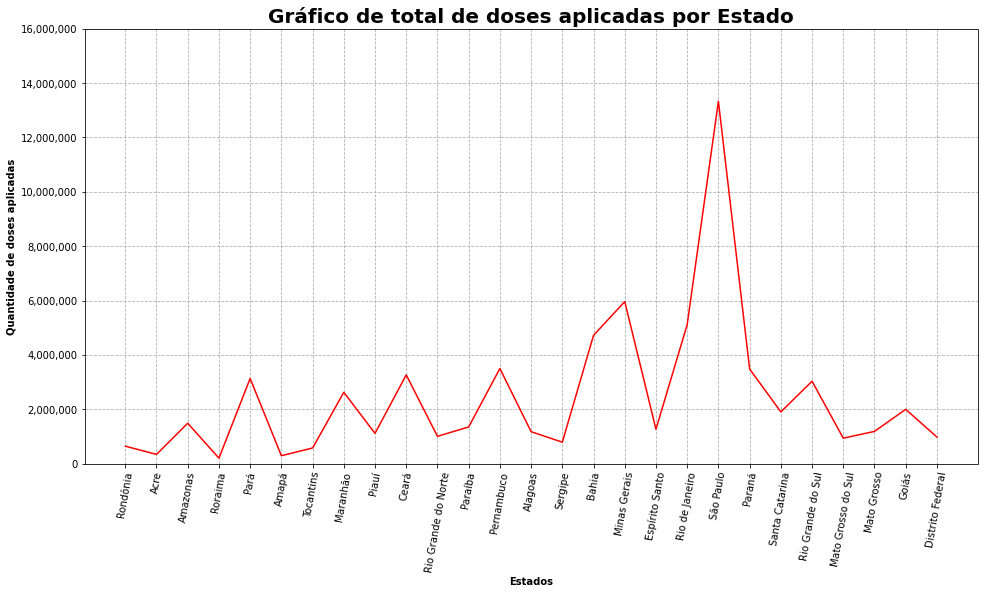

In [155]:
#gráfico do total de vacinas por Estado

plt.figure(figsize=(16,8))
sns.set_style()

ax = sns.lineplot(data=polio_usaveis, x=polio_usaveis.index, y="Total", color= "red")

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.ylim(0,16000000)
plt.xticks(rotation=80)

#colocando grid
plt.grid(linestyle="--")

#Inserindo os tíulos
plt.ylabel("Quantidade de doses aplicadas", fontweight="bold")
plt.xlabel("Estados",fontweight="bold")
plt.title("Gráfico de total de doses aplicadas por Estado", fontsize=20,fontweight="bold")

plt.show()

##GRÁFICO 02

<p align = "justify">Aqui nesse gráfico podemos perceber a variação de doses aplicadas nos Estados. Porém, embora os número de aplicações sejam variáveis, existe uma faixa que diríamos ser comum entre todos eles, com exceção de Bahia, Minas Gerais e São Paulo, que possuem números que extrapolam a faixa média averiguada com o auxílio do gráfico.</p>

In [156]:
regiao_sul = polio_usaveis.loc[["Rio Grande do Sul", "Santa Catarina", "Paraná"]]
regiao_sul.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,154346,149235,163749,172072,157621,145203,143492,145450,143738,140058,133253,126127,127331,123408,127058,119476,138103,132583,126057,121051,122683,118883,3030977.00
Santa Catarina,88088,84974,89362,97263,93090,84956,84457,85707,85835,85546,85235,82542,85567,82456,84429,83417,85543,86254,91982,85372,83999,87036,1903110.00
Paraná,178827,178566,174272,187300,176895,169527,162644,159099,159890,158957,151523,145522,149707,148567,152898,144370,160010,152038,151676,139974,143474,136007,3481743.00


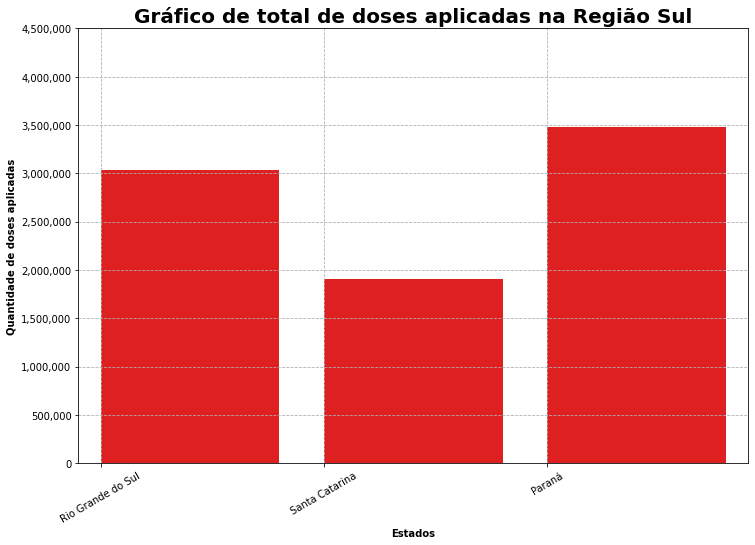

In [157]:
#gráfico do total de vacinas por Estado da REGIÃO SUL

plt.figure(figsize=(12,8))
sns.set_style()

ax = sns.barplot(data=regiao_sul, x=regiao_sul.index, y="Total", color= "red")

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.ylim(0,4500000)
plt.xticks(rotation=30)

#colocando grid
plt.grid(linestyle="--")

#Inserindo os tíulos
plt.ylabel("Quantidade de doses aplicadas", fontweight="bold")
plt.xlabel("Estados",fontweight="bold")
plt.title("Gráfico de total de doses aplicadas na Região Sul", fontsize=20,fontweight="bold")

plt.show()

##GRÁFICO 03

<p align = "justify">No que tange à Região Sul do país, temos como campeão de aplicações o Paraná. Em segundo e terceiro lugar, respectivamente, temos Rio Grande do Sul e Santa Catarina.</p>

In [158]:
#removendo o campo TOTAL das colunas, para plotar o gráfico de "Total X Ano"

regiao_sul = polio_usaveis.loc[["Rio Grande do Sul", "Santa Catarina", "Paraná"]].drop("Total", axis=1)

polio_usaveis = polio_usaveis.drop("Total", axis=1) #eixo da coluna

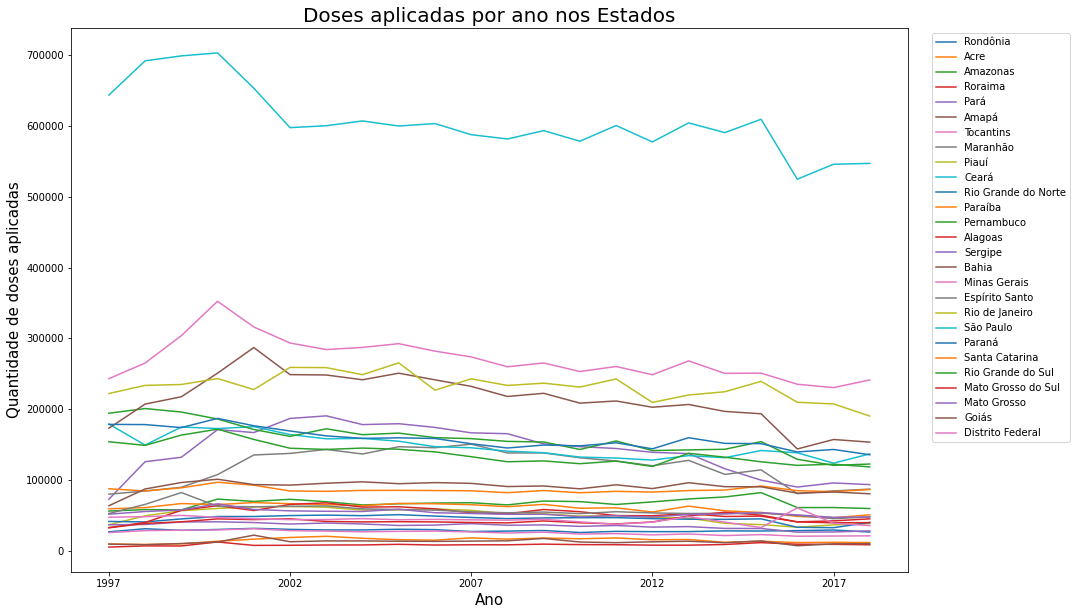

In [159]:
#gráfico do total de vacinas por Estado e por ano

polio_usaveis.T.plot(figsize=(15,10))
plt.title("Doses aplicadas por ano nos Estados", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Quantidade de doses aplicadas", fontsize=15)
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)
plt.show()

##GRÁFICO 04

<p align = "justify">No gráfico acima, embora não seja possível diferenciar de forma adequada as linhas relativas aos Estados, quando analisamos o mesmo de forma geral, é percepível certo declínio na aplicação de doses na maioria dos Estados, com o passar do tempo.</p>

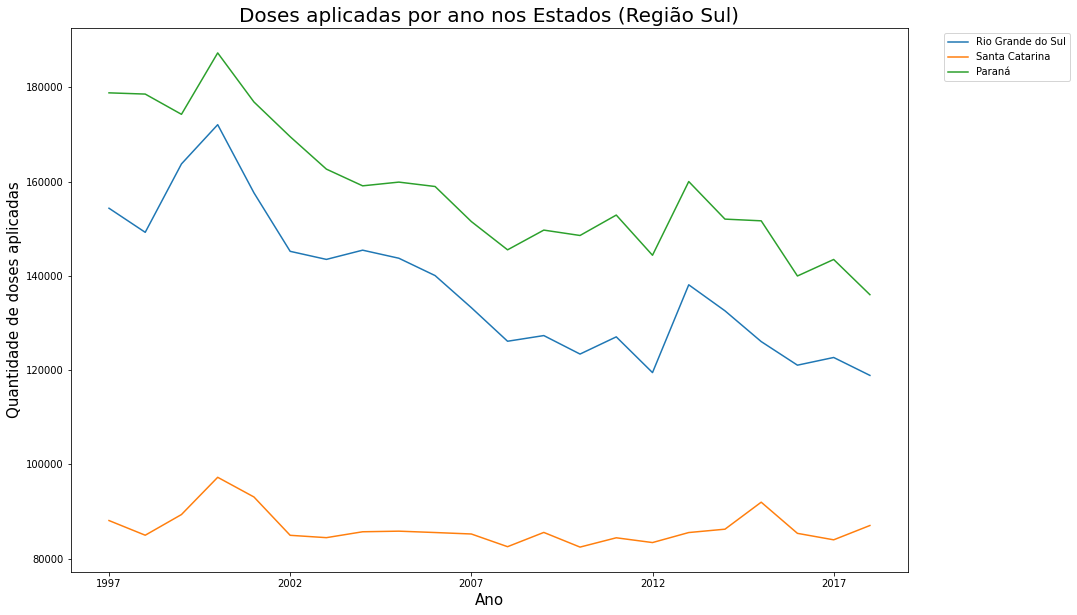

In [160]:
#gráfico do total de vacinas por Estado e por ano, apenas na Região Sul

regiao_sul.T.plot(figsize=(15,10))
plt.title("Doses aplicadas por ano nos Estados (Região Sul)", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Quantidade de doses aplicadas", fontsize=15)
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)
plt.show()

##GRÁFICO 05

<p align = "justify">Filtrando os três Estados da Região Sul, para uma melhor análise. O filtro tamnbém é interessante por demonstrar uma queda no número de aplicações de vacinas nos Estados do Rio Grande do Sul e Paraná, distoando dos números relativos à Santa Catarina, uma vez que este Estado mantêm-se de certo modo estável, com apenas dois picos, e nos últimos anos com característica ascendente. É interessante notar que, conforme visto no gráfico de barras anteriormente (GRÁFICO 03), Santa Catarina é o Estado com menos doses de vacinas aplicadas. Entretando, é o Estado que menos sofreu variação ao longo do período.</p>

In [161]:
#anos em que menos foram aplicadas vacinas (começando pelo menos número de aplicações em cima)

polio_usaveis.sum().sort_values(ascending=False)

2000    3424919
2001    3327803
1999    3221283
2002    3212628
2003    3209756
2005    3188367
2004    3152042
2006    3098951
2007    3047976
1998    3046858
2009    2985774
2008    2939834
2013    2934278
2011    2918479
2010    2861066
2015    2852556
1997    2827700
2014    2810642
2012    2780576
2018    2516533
2016    2513077
2017    2508194
dtype: int64

<p align = "justify">Ordenando a aplicação de doses por ano, do maior para o menor, verifica-se que que os três anos mais recentes (2018, 2016 e 2017, nessa ordem) são os que tiveram menor aplicação de doses da vacina.</p>

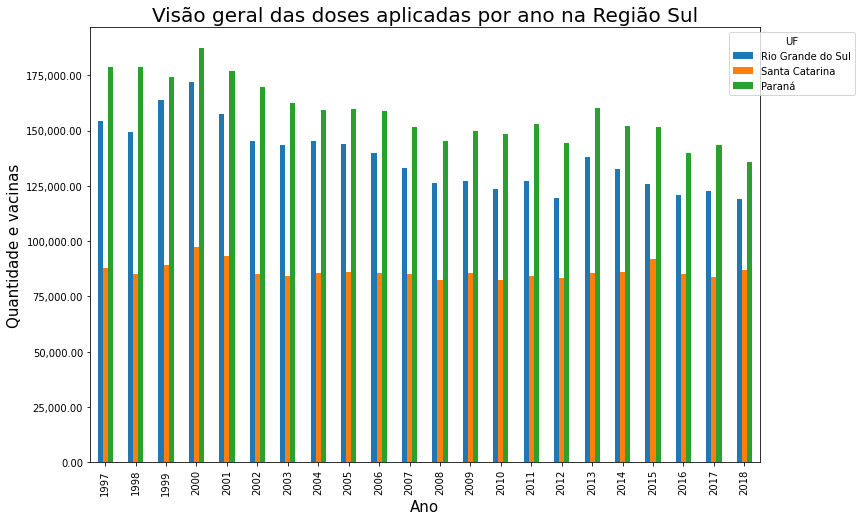

In [162]:
#plotando o gráfico de barras, apenas da Região SUL

ax = regiao_sul.T.plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral das doses aplicadas por ano na Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Quantidade e vacinas", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

##GRÁFICO 06

<p align = "justify">Neste outro gráfico apenas da Região Sul podemos verificar novamente a oscilação sofrida ao longo dos anos nos três Estados, percebendo-se uma tendência de queda principalmente no RS e no PR, conforme já dito anteriormente. Já SC mantêm uma certa estabilidade ao longo dos anos, mesmo apresentando flutuações nos anos analisados.</p>



---



# **POPULAÇÃO**

**Análise da POPULAÇÃO nos Estados.** 

<p align = "justify">O arquivo abaixo foi obtido no site do IBGE ("https://sidra.ibge.gov.br/tabela/6579") no formato XLSX. Nele podemos encontrar dados populacionais por Ano e por UF do Brasil. Os dados foram transpostos na tabela original para melhor utilização quanto à comparação que será realizada com os número de vacinação.</p>

In [163]:
#importando os dados obtidos no IBGE e fazendo a visuaização prévia

populacao = pd.read_excel("https://github.com/anderboni/Projeto_Modulo_02_Bootcamp_Data_Science/blob/main/Dados/Tabela_6579_transposta.xlsx?raw=true", skiprows= 3, skipfooter=1, thousands=".")

#mostra as primeiras 5 linhas
populacao.head()

,Unnamed: 0,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Rondônia,1493565,1503928,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460
1,Acre,680075,691132,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470
2,Amazonas,3341094,3393369,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714
3,Roraima,412783,421499,460165,469524,488072,496936,505665,514229,522636,576568,605761,631181
4,Pará,7321490,7431020,7688593,7777543,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745


In [164]:
#Renomeando a coluna Ano e deixando o ano como index

populacao.rename(columns={"Unnamed: 0":"Unidade da Federação"}, inplace=True)
populacao.set_index("Unidade da Federação",inplace=True)
populacao.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,
Rondônia,1493565,1503928,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460
Acre,680075,691132,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470
Amazonas,3341094,3393369,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714
Roraima,412783,421499,460165,469524,488072,496936,505665,514229,522636,576568,605761,631181
Pará,7321490,7431020,7688593,7777543,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745


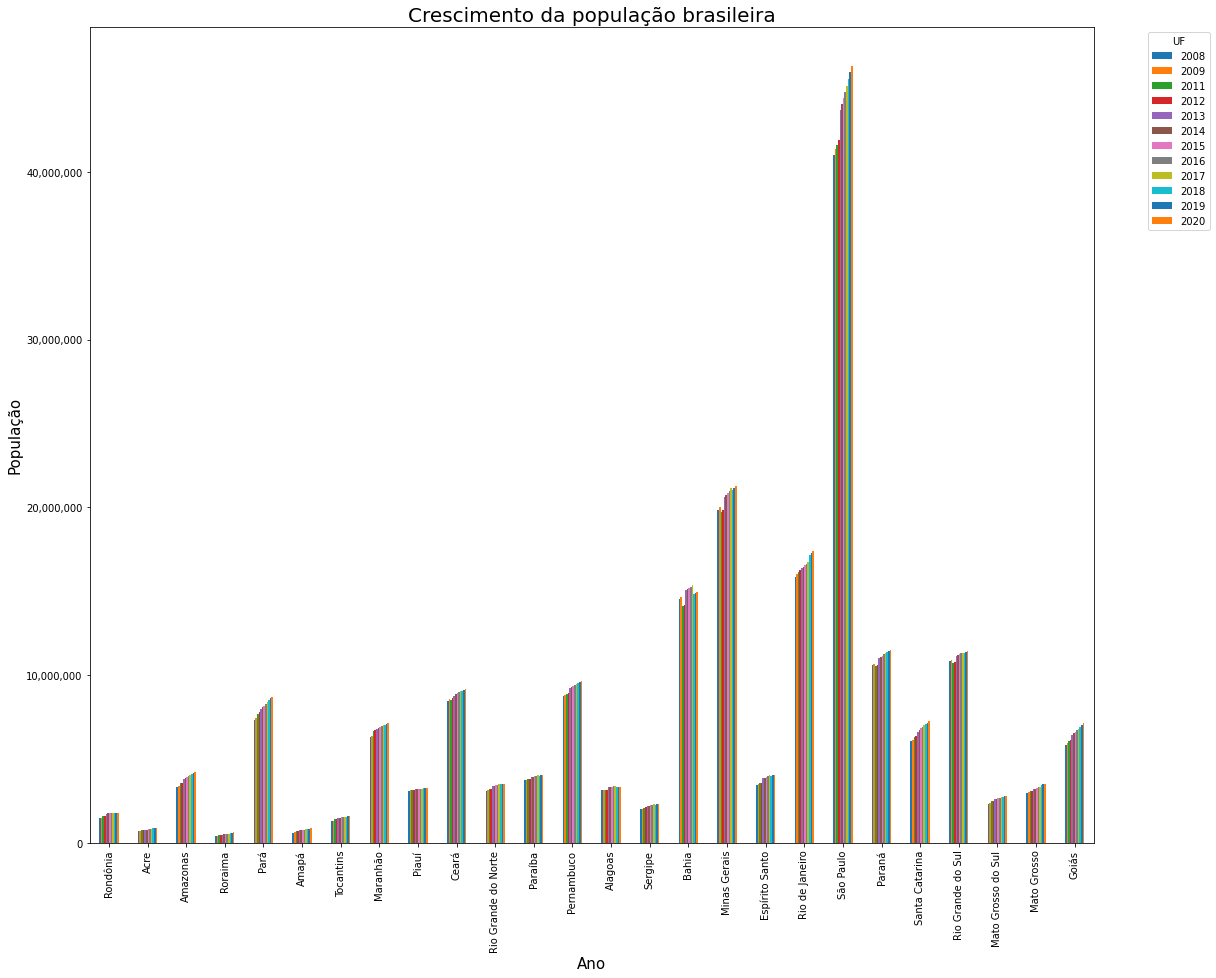

In [165]:
#plotando o gráfico da população Brasileira

ax = populacao.plot(kind="bar", figsize=(18,15))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("Crescimento da população brasileira", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("População", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.12, 1), frameon=True)
plt.show() 

##GRÁFICO 07

<p align = "justify">Neste gráfico temos a intenção de mostrar de forma rápida os números relativos à população nos Estados brasileiro, onde é possível perceber o crescimento populacional ao longo dos anos.</p>

---
# **COMPARATIVO de Doses X População**

<p align = "justify">Nesse ponto iremos comparar os anos de 2008 a 2018, pois estes são os anos que temos em ambos os datasets. O ano de 2010 também não constará na análise, uma vez que o mesmo não faz parte do dataset da aplicação de doses da vacina de POLIO, o qual foi obtido no site TABNET do Datasus.</p>


In [166]:
#ajustando os dados POLIO para o período que iremos utilizar na comparação

#retirando os anos que não serão utilizados nessa análise (nota: 2010 também precisou ser excluído, pois não consta na "população")

polio_comparativo = polio_usaveis.drop(["1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2010"], axis=1) 

polio_comparativo.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,
Rondônia,28390,29203,27986,27559,27664,28654,28514,29049,29923,27046
Acre,17025,18696,18717,16194,16509,12585,14078,12167,12612,12207
Amazonas,65312,70763,65908,69525,73694,76499,82643,61556,61601,60189
Roraima,9045,9989,9203,8554,8543,9490,12131,9820,9716,9089
Pará,165702,151337,144821,139453,137661,116248,100218,90485,96257,93892


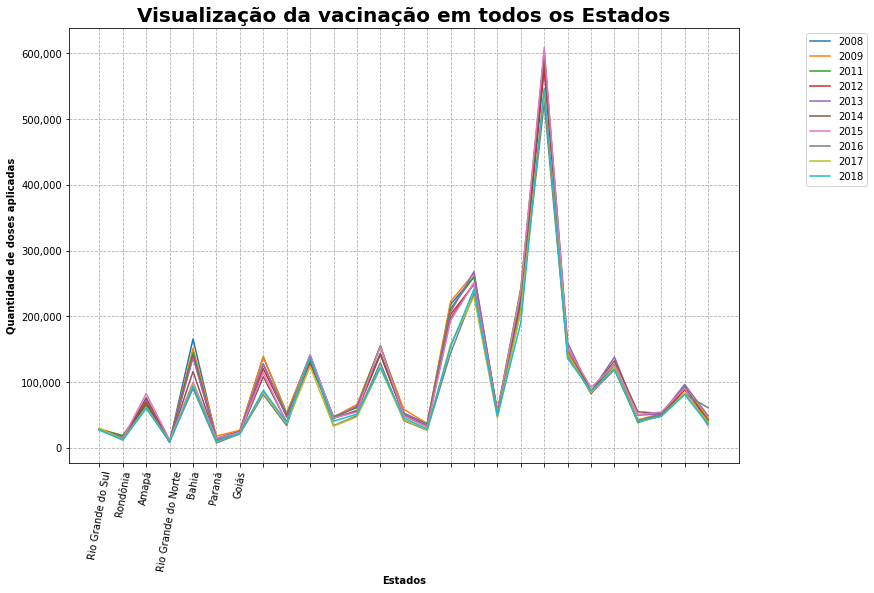

In [167]:
#plotando o gráfico de vacinação nos Estados

ax = polio_comparativo.plot(figsize=(12,8))  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) 

#Inserindo os tíulos
plt.title("Visualização da vacinação em todos os Estados", fontsize=20,fontweight="bold")
plt.ylabel("Quantidade de doses aplicadas", fontweight="bold")
plt.xlabel("Estados",fontweight="bold")
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.xticks(rotation=80)

#colocando grid
plt.grid(linestyle="--")


plt.show()

##GRÁFICO 08

<p align = "justify">Este gráfico demonstra a vacinação nos estados, onde é perceptível o formato regular das curvas ao longo de todos os anos analisados, com pequenas variações.</p>

In [168]:
#ajustando os dados POPULAÇÃO para o período que iremos utilizar na comparação

populacao_comparativo = populacao.drop(["2019", "2020"], axis=1) 
populacao_comparativo.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,
Rondônia,1493565,1503928,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589
Acre,680075,691132,746386,758786,776463,790101,803513,816687,829619,869265
Amazonas,3341094,3393369,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611
Roraima,412783,421499,460165,469524,488072,496936,505665,514229,522636,576568
Pará,7321490,7431020,7688593,7777543,7969654,8073924,8175113,8272724,8366628,8513497


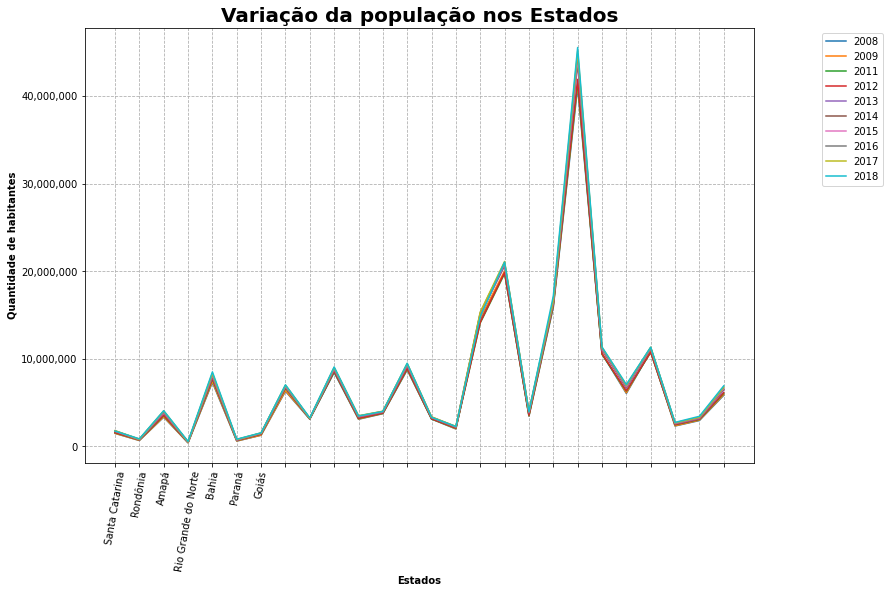

In [169]:
#plotando o gráfico da população

ax = populacao_comparativo.plot(figsize=(12,8))  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) 

#Inserindo os tíulos
plt.title("Variação da população nos Estados", fontsize=20,fontweight="bold")
plt.ylabel("Quantidade de habitantes", fontweight="bold")
plt.xlabel("Estados",fontweight="bold")
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.xticks(rotation=80)

#colocando grid
plt.grid(linestyle="--")


plt.show()

##GRÁFICO 09

<p align = "justify">Este é o gráfico que demonstra o crescimento da população, já visto anteriormente no GRÁFICO 07, só que desta vez em formato de linhas. A variação da população nos Estados e as doses distribuídas para estes mesmo Estados será analisada, por fim, no próximo gráfico.</p>

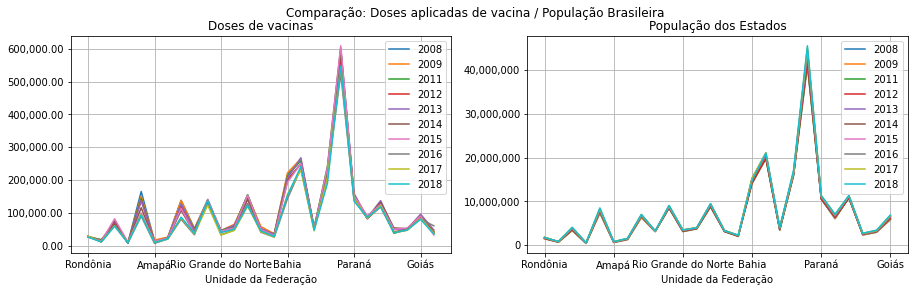

In [170]:
#gráfico comparatico 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

a1 = polio_comparativo.plot(grid=True, ax=axs[0],
                title="Doses de vacinas")

a2 = populacao_comparativo.plot(grid=True, ax=axs[1],
                title="População dos Estados")

a1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
a2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.suptitle("Comparação: Doses aplicadas de vacina / População Brasileira", fontdict = {'fontsize' : 20})


plt.show()

##GRÁFICO 10

<p align = "justify">Neste ponto, analisando ambos os gráficos, é possível deduziar que as doses de vacinas são distribuídas de maneira proporcional, conforme a população, ao longo dos anos. No gráfico das doses (1º à esquerda) nota-se a proporção de distribuição entre os Estados, porém com certa queda no número de distribuição. Já no gráfico da população (2º à direita) nota-se o aumento da população, evidenciado, em anbos os casos, pelas cores das linhas dos gráficos. Dessa forma podemos entender que a maneira do governo distribuir as doses de vacinas seria estritamente conforme a população dos Estados, sendo este, em princípio, o único critério (em uma primeira análise). Quanto à distribuição de doses (perceptível também no GRÁFICO 08), é possível que este número tenha sido reduzido em decorrência da falta de verbas ou então devido a mudança de políticas públicas na área da saúde.</p>

In [171]:
#utilizando a função já construída anteriormente para obter o TOTAL

soma_coluna(polio_comparativo, "total_polio", ["2008", "2009", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
polio_comparativo.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018,total_polio
Unidade da Federação,,,,,,,,,,,
Rondônia,28390,29203,27986,27559,27664,28654,28514,29049,29923,27046,283988.00
Acre,17025,18696,18717,16194,16509,12585,14078,12167,12612,12207,150790.00
Amazonas,65312,70763,65908,69525,73694,76499,82643,61556,61601,60189,687690.00
Roraima,9045,9989,9203,8554,8543,9490,12131,9820,9716,9089,95580.00
Pará,165702,151337,144821,139453,137661,116248,100218,90485,96257,93892,1236074.00


In [172]:
#utilizando a função já construída anteriormente para obter o TOTAL

soma_coluna(populacao_comparativo, "total_populacao", ["2008", "2009", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
populacao_comparativo.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018,total_populacao
Unidade da Federação,,,,,,,,,,,
Rondônia,1493565,1503928,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,16759564.00
Acre,680075,691132,746386,758786,776463,790101,803513,816687,829619,869265,7762027.00
Amazonas,3341094,3393369,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,37629727.00
Roraima,412783,421499,460165,469524,488072,496936,505665,514229,522636,576568,4868077.00
Pará,7321490,7431020,7688593,7777543,7969654,8073924,8175113,8272724,8366628,8513497,79590186.00


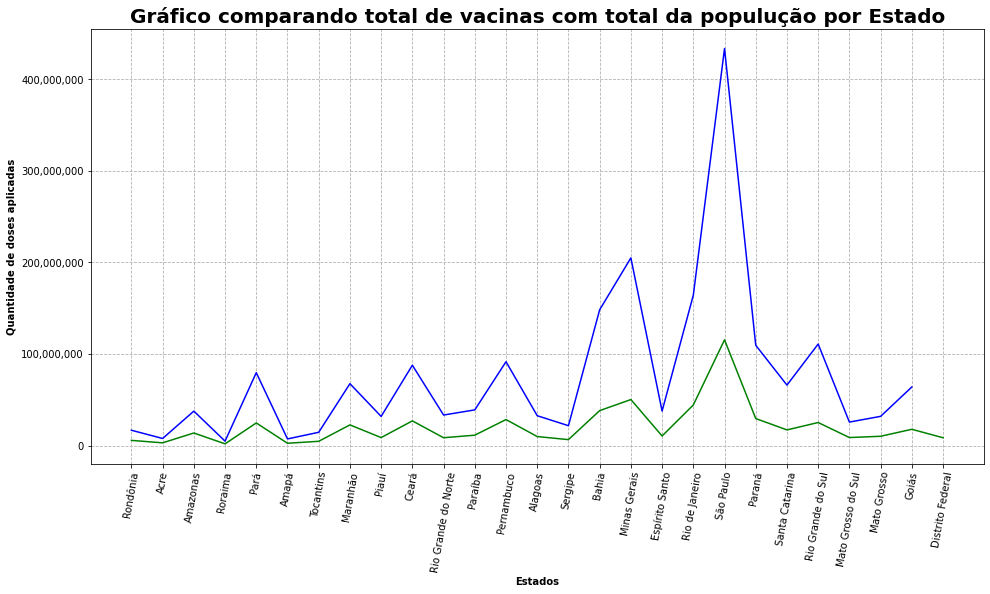

In [173]:
#gráfico comparando total de vacinas com total da população por Estado

tp = polio_comparativo["total_polio"] * 20 #total_polio multiplicado por 80, para auxiliar na visuliazação dos valores no gráfico

plt.figure(figsize=(16,8))
sns.set_style()

ax = sns.lineplot(data=polio_comparativo, x=polio_comparativo.index, y=tp, color= "green")
ax = sns.lineplot(data=populacao_comparativo, x=populacao_comparativo.index, y="total_populacao", color= "blue")

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
#plt.ylim(0,16000000)
plt.xticks(rotation=80)

#colocando grid
plt.grid(linestyle="--")

#Inserindo os tíulos
plt.ylabel("Quantidade de doses aplicadas", fontweight="bold")
plt.xlabel("Estados",fontweight="bold")
plt.title("Gráfico comparando total de vacinas com total da populução por Estado", fontsize=20,fontweight="bold")

plt.show()

##GRÁFICO 11 (linha azul = população; linha verde = vacinas)

<p align = "justify">Neste ponto a variável relativa a vacina polio foi ampliada em 20 vezes para que fosse possível aparecer no gráfico comparativo acima, em razão do número de doses ser muito menor do que a população. Isso deve-se ao fato das vacinas serem destinadas apenas às crianças. Nesse ponto é perceptível a variação de doses conforme a variação da população, em sua maioria. Isso corrobora o que já foi observado nos gráficos e tabelas anteriores, reforçando a tese de que o governo tem como único critério a distribuição de doses em função da população. Acreditamos que o percentual de vacinas distribuídas deveria corresponder à quantidade de crianças dentro da faixa etária prevista para aplicação da correspondente dose, o que não foi verificado neste estudo, o qual poderá ser expandido no futuro, abrangendo estes critérios embasados em novos dados.</p>

In [174]:
#preparando para "derreter" a tabela (retirando a coluna "total_polio")

polio_aberto = polio_comparativo.drop("total_polio", axis=1)
polio_aberto.head()

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,
Rondônia,28390,29203,27986,27559,27664,28654,28514,29049,29923,27046
Acre,17025,18696,18717,16194,16509,12585,14078,12167,12612,12207
Amazonas,65312,70763,65908,69525,73694,76499,82643,61556,61601,60189
Roraima,9045,9989,9203,8554,8543,9490,12131,9820,9716,9089
Pará,165702,151337,144821,139453,137661,116248,100218,90485,96257,93892


In [175]:
#"derretendo" a tabela (quebrar pra baixo)

polio_aberto = polio_aberto.reset_index().melt(id_vars=["Unidade da Federação"], value_vars=polio_aberto.columns, 
                                                    var_name='ano', value_name='doses')
polio_aberto
#polio_aberto = populacao_aberto.groupby("Unidade da Federação")

,Unidade da Federação,ano,doses
0,Rondônia,2008,28390
1,Acre,2008,17025
2,Amazonas,2008,65312
3,Roraima,2008,9045
4,Pará,2008,165702
...,...,...,...
265,Rio Grande do Sul,2018,118883
266,Mato Grosso do Sul,2018,40311
267,Mato Grosso,2018,48369
268,Goiás,2018,80976


<p align = "justify">A partir da tabela acima, ficou pendente implementar o gráfico comparativo para a Região Sul (RS, SC e PR), onde o eixo X terá os ANOS e o eixo Y terá o total de DOSES destinadas à aplicação nos três Estados desta região.</p>



---



#**Conclusões**

<p align = "justify">Do presente estudo, que sem dúvida poderá ser aprimorado e expandido para outras análises e com outras espécies de dados, como por exemplo a incidência de poliomielite em crianças e outras informações governamentais acerca de critérios de distribuição de vacinas, conseguimos extrair algumas conclusões:</p> 

<p align = "justify">A primeira conclusão que chegamos ao analisar os dados obtidos é a de que o governo, em princípio, utilizaria como critério de distribuição das vacinas para a poliomielite o número da população do Estado, o que foi observado em diferentes tipos de gráficos, onde as doses aplicadas acompanham a proporção da população, porém em número bastante menor, principalmente em função deste tipo de vacina ser destinado às crianças em faixa etária específica.</p>

<p align = "justify">Deve-se observar, a partir da premissa elencada acima, que a realidade de cada Estado certamente é diferente, sendo necessário um entendimento mais amplo dessa questão para compreender os critérios de distribuição de doses, não sendo possível estabelecer, num primeiro momento, a razão para a distribuição mencionada acontecer de forma igualitária, sem levar em conta a situação específica de cada local para o qual as vacinas são destinadas.</p>

<p align = "justify">Outra conclusão passível de verificação com base neste breve estudo é a de que o número de doses aplicadas tem de certa forma reduzido com o passar dos anos, dentro do período analisado, o que contrasta com o crescimento da população, também verificado nos gráficos acima. Ou seja, embora o número de vacinas seja proporcional ao número de habitantes dos Estados, as doses tem sido cada vez menores ao longo dos anos, pelo menos na maioria dos Estados analisados. Embora não haja casos de poliomielite atualmente relatados no Brasil, caso esta política de redução de distribuição de doses de vacina estiver sendo adotado em outros países, isto poderia exlicar de certa forma a possibilidade de aumento do número de casos de poliomielite em crianças, conforme relatado no início deste estudo. Salienta-se, por fim, que uma política de redução de vacinas, visualizada a partir dos dados analisados acima, poderá colocar o Brasil no mapa de reintrodução da poliomielite, o que deve ser evitado a partir da reformulação de políticas de saúde pública. </p>



---

